In [1]:
# 1. Import the necessary libraries:
from astropy.table import Table
from astropy.io import fits
from astroquery.mast import Observations
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['figure.figsize'] = (20,7)
plt.style.use("bmh")

In [2]:
#NUV
#first read the x1d fits file as a hdu list
x1d_file="./Data/NUV/ODLZ14010/ODLZ14010_x1d.fits"
x1d_hdul = fits.open(x1d_file)

In [3]:
#get information about the fits file
x1d_hdul.info()

Filename: ./Data/NUV/ODLZ14010/ODLZ14010_x1d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     299   ()      
  1  SCI           1 BinTableHDU    157   40R x 19C   [1I, 1I, 1024D, 1024E, 1024E, 1024E, 1024E, 1024E, 1024E, 1024I, 1E, 1E, 1I, 1E, 1E, 1E, 1E, 1024E, 1E]   


In [4]:
fits.getheader(x1d_file,1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                38946 / width of table in bytes                        
NAXIS2  =                   40 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
TTYPE1  = 'SPORDER '           / label for field   1                            
TFORM1  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'NELEM   '           / label for field   2                            
TFORM2  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE3  = 'WAVELENGTH'      

In [5]:
nuv_data = fits.getdata(x1d_file, 1)
print(nuv_data.shape)

(40,)


Text(0, 0.5, 'Flux [ergs/s/cm$^2$/$\\AA$]')

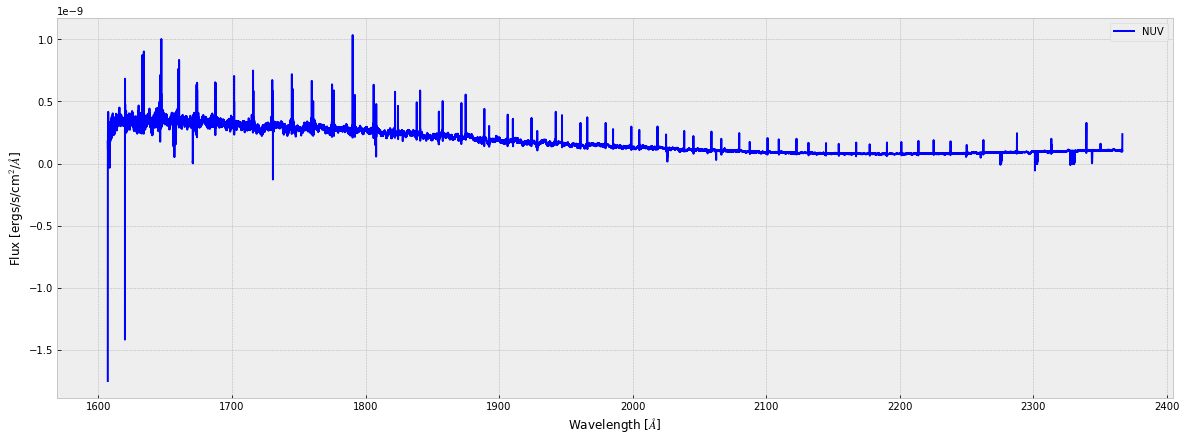

In [6]:
wl = nuv_data["wavelength"].flatten()
flux = nuv_data["flux"].flatten()
order = np.argsort(wl)
wl = np.array(wl)[order]
flux = np.array(flux)[order]
plt.plot(wl, flux, color="blue", label="NUV")
plt.legend(loc="best")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux [ergs/s/cm$^2$/$\AA$]")

In [8]:
#x2d image
flt_file="./Data/NUV/ODLZ14010/ODLZ14010_flt.fits"
fits.info(flt_file)

Filename: ./Data/NUV/ODLZ14010/ODLZ14010_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     241   ()      
  1  SCI           1 ImageHDU       120   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        61   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        44   (1024, 1024)   int16   


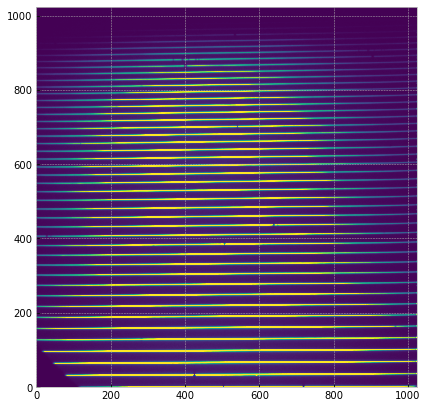

In [20]:
flt_data=fits.open(flt_file)[1].data
plt.imshow(flt_data,origin='lower',vmin=0,vmax=1e3,cmap="viridis")